In [1]:
from google.colab import files
uploaded = files.upload()

Saving Coca Cola Cleaned.csv to Coca Cola Cleaned.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [5]:
# Step 1 : Load data
df = pd.read_csv("Coca Cola Cleaned.csv")

# Convert Date column
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Set Date as index
df.set_index('Date', inplace=True)

df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1962-01-02,0.05,0.05,0.05,0.05,806400,0,0
1962-01-03,0.05,0.05,0.05,0.05,1574400,0,0
1962-01-04,0.05,0.05,0.05,0.05,844800,0,0
1962-01-05,0.05,0.05,0.05,0.05,1420800,0,0
1962-01-08,0.05,0.05,0.05,0.05,2035200,0,0


In [ ]:
# Step 2: Exploratory Data Analysis
# Basic Information
print("Shape:", df.shape)
print(df.info())
df.describe()

Shape: (580047, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580047 entries, 0 to 580046
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Open          580047 non-null  float64
 1   High          580047 non-null  float64
 2   Low           580047 non-null  float64
 3   Close         580047 non-null  float64
 4   Volume        580047 non-null  int64  
 5   Dividends     580047 non-null  int64  
 6   Stock Splits  580047 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 31.0 MB
None


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,580047.000000,580047.000000,580047.000000,580047.000000,5.800470e+05,580047.0,580047.000000
mean,11.712536,11.805761,11.617738,11.715103,9.123806e+06,0.0,0.001114
std,14.930528,15.037485,14.821093,14.931153,7.957318e+06,0.0,0.049221
min,0.040000,0.040000,0.030000,0.040000,7.680000e+04,0.0,0.000000
25%,0.240000,0.240000,0.240000,0.240000,2.880000e+06,0.0,0.000000
50%,4.900000,4.940000,4.850000,4.910000,7.690400e+06,0.0,0.000000
75%,17.290000,17.480000,17.060000,17.300000,1.304010e+07,0.0,0.000000
max,66.040000,66.240000,64.780000,65.260000,1.241690e+08,0.0,3.000000


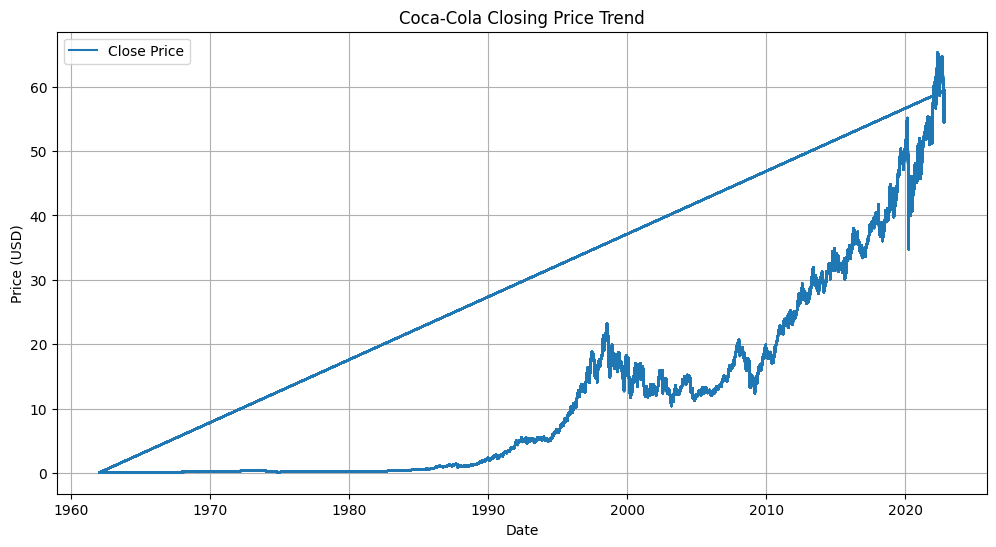

In [ ]:
# Coca-Cola Closing Price Trend
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title("Coca-Cola Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-410868738.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['Close'].resample('M').mean()


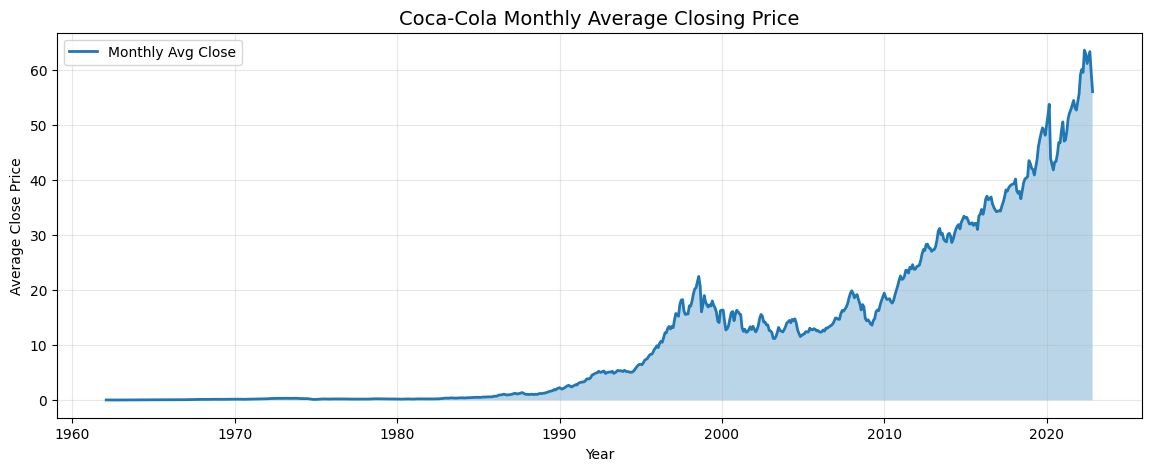

In [ ]:
# Monthly Average Closing Price
df_monthly = df['Close'].resample('M').mean()

plt.figure(figsize=(14,5))
plt.plot(df_monthly.index, df_monthly, linewidth=2, label="Monthly Avg Close")
plt.fill_between(df_monthly.index, df_monthly, alpha=0.3)

plt.title("Coca-Cola Monthly Average Closing Price", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Close Price")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

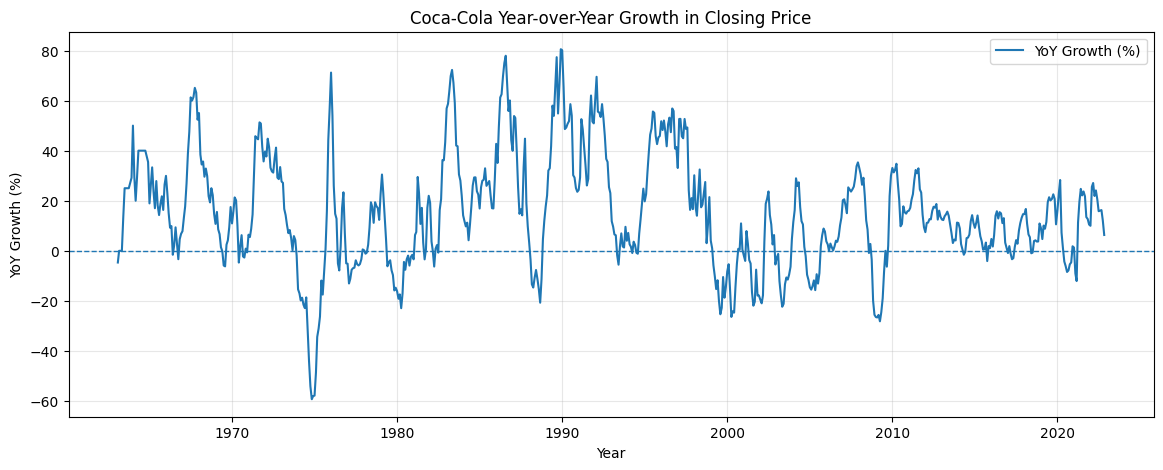

In [ ]:
# Year-Over-Year Growth
df_yoy = df_monthly.pct_change(periods=12) * 100

plt.figure(figsize=(14,5))
plt.plot(df_yoy.index, df_yoy, linewidth=1.5, label="YoY Growth (%)")

plt.axhline(0, linestyle='--', linewidth=1)  # zero-growth reference line

plt.title("Coca-Cola Year-over-Year Growth in Closing Price")
plt.xlabel("Year")
plt.ylabel("YoY Growth (%)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

/tmp/ipython-input-878821708.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volume = df['Volume'].resample('M').mean()


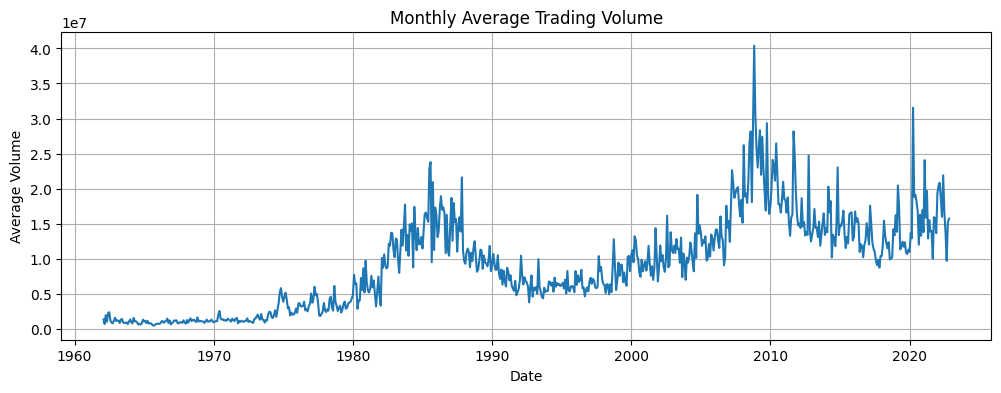

In [ ]:
# Monthly Average Volume
monthly_volume = df['Volume'].resample('M').mean()

plt.figure(figsize=(12,4))
plt.plot(monthly_volume.index, monthly_volume.values)
plt.title("Monthly Average Trading Volume")
plt.xlabel("Date")
plt.ylabel("Average Volume")
plt.grid(True)
plt.show()


In [6]:
# Daily Returns
df['Daily_Return'] = df['Close'].pct_change()

df['Daily_Return'].describe()


,Daily_Return
count,580046.000000
mean,0.000592
std,0.021241
min,-0.999158
25%,-0.003761
50%,0.000000
75%,0.004729
max,0.250000


In [7]:
# Step 3: Feature Engineering (For ML)
# Create fretures
df['Return'] = df['Close'].pct_change().shift(-1)
df.dropna(inplace=True)

df['Return_lag1'] = df['Return'].shift(1)
df['Return_lag5'] = df['Return'].shift(5)

X = df[['Return_lag1', 'Return_lag5']]
y = df['Return']

df_model = pd.concat([X, y], axis=1).dropna()



In [8]:
# Step 4: Build ML Model
# Time-Series Train
split = int(len(df_model) * 0.8)

X_train = df_model.iloc[:split][['Return_lag1', 'Return_lag5']]
X_test  = df_model.iloc[split:][['Return_lag1', 'Return_lag5']]

y_train = df_model.iloc[:split]['Return']
y_test  = df_model.iloc[split:]['Return']


In [9]:
# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, predictions))
print("R2 Score:", r2_score(y_test, predictions))

MAE: 0.010670856854050354
R2 Score: 0.015325786071899827


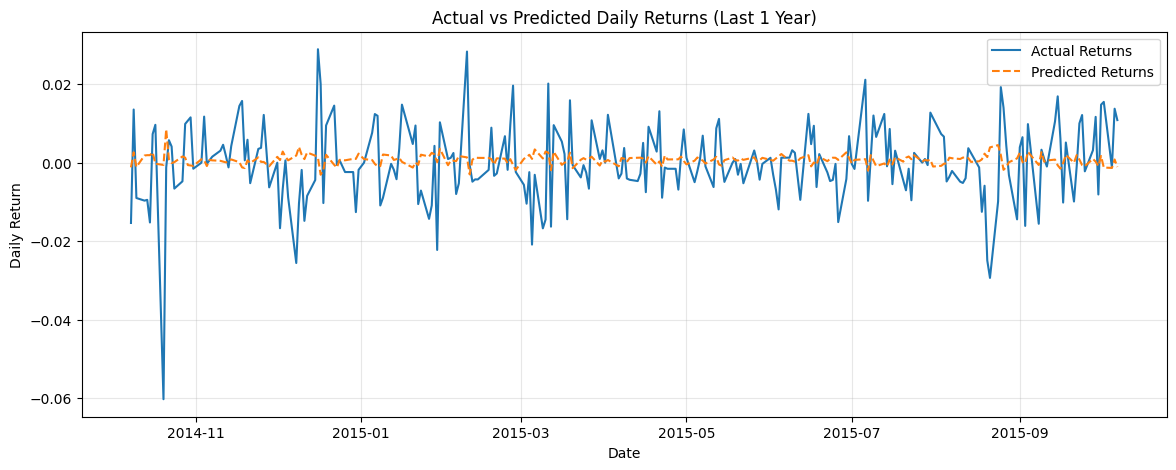

In [ ]:
# Save test dates
test_dates = y_test.index

# Actual vs Predicted Daily Returns (Last 1 Year)
plt.figure(figsize=(14,5))
plt.plot(test_dates[-252:], y_test[-252:], label="Actual Returns")
plt.plot(test_dates[-252:], predictions[-252:], label="Predicted Returns", linestyle="--")

plt.title("Actual vs Predicted Daily Returns (Last 1 Year)")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()



In [12]:
# Step 5: Live-Updating System
import yfinance as yf
import yfinance as yf

live_data = yf.download("KO", period="5d", interval="1d")
live_data.tail()



/tmp/ipython-input-2111102715.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  live_data = yf.download("KO", period="5d", interval="1d")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,KO,KO,KO,KO,KO
Date,,,,,
2025-12-15,70.970001,71.320000,70.320000,70.430000,18660100
2025-12-16,70.370003,71.300003,70.320000,71.300003,17370000
2025-12-17,70.669998,70.919998,70.309998,70.570000,13672700
2025-12-18,70.360001,70.800003,70.169998,70.269997,15524800
2025-12-19,70.059998,70.769997,70.029999,70.059998,36906800
